In [19]:
# Basic Monte Carlo II

import random
import numpy as np

def generate_walk(L):
    """
    Generates a self-avoiding walk (SAW) of length L using importance sampling.

    The walk starts at the origin (0,0). At each step, a move is chosen uniformly 
    from the set of available self-avoiding moves. The function calculates 
    a realisation of the importance sampling estimate, which is the product of 
    the number of valid choices at each step.

    If a walk reaches a dead end (no valid moves left), it stays in place for 
    the remaining steps.

    The realisations of multiple runs of the function are averaged to obtain
    an estimate of the expected value of c_L.

    Returns:
        realisation (int): A single realisation of the Monte Carlo estimate for c_L.
    """
    pos = (0, 0)  # Start at the origin
    visited = {pos}  # Track visited positions to ensure self-avoidance
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Possible moves (Up, Right, Down, Left)
    realisation = 1  # Stores the computed realisation

    for _ in range(L): # Loop over each step of the walk
        valid_moves = []
        
        # Check all possible moves and keep only the valid (non-visited) ones
        for move in moves:
            new_pos = (pos[0] + move[0], pos[1] + move[1])
            if new_pos not in visited:
                valid_moves.append(move)
        
        # Multiply by the number of valid moves to compute the realisation
        realisation *= len(valid_moves)
        
        # If valid moves exist, choose one randomly and update position
        if valid_moves:
            dx, dy = random.choice(valid_moves)
            new_pos = (pos[0] + dx, pos[1] + dy)
            visited.add(new_pos)
            pos = new_pos

    return realisation  # This is one realization of our Monte Carlo estimate for c_L

# Compute Monte Carlo estimates for c_L for L = 0 to 10 using 100,000 samples per length
for i in range(11):
    samples = [generate_walk(i) for _ in range(100000)]
    print(f"Estimated c_{i}: {np.mean(samples)}")

Estimated c_0: 1.0
Estimated c_1: 4.0
Estimated c_2: 12.0
Estimated c_3: 36.0
Estimated c_4: 99.95328
Estimated c_5: 284.02812
Estimated c_6: 780.18552
Estimated c_7: 2171.22768
Estimated c_8: 5933.76192
Estimated c_9: 16254.27324
Estimated c_10: 44143.12728


# Estimate $\mu$ based on $c_N$

Since $c_N \sim \mu^N$:
$$ \log{c_N} = N \log{\mu}$$

We can plot the graph of $\log{c_N}$ against $N$ for $N=1$ to $N=10$ and calculate the gradient of the best-fit straight line. This will give the value of $\log{mu}$. From there, we can estimate $\mu$

In [22]:
c = []
for i in range(50):
    samples = [generate_walk(i) for _ in range(100000)]
    c.append(np.mean(samples))

In [ ]:
import matplotlib.pyplot as plt

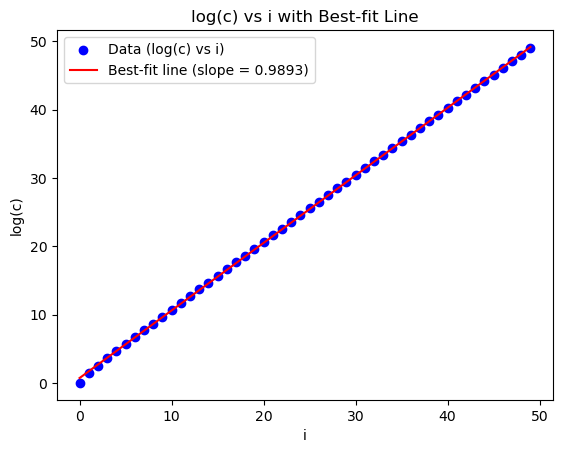

In [26]:
log_c = np.log(c)
i = np.array([t for t in range(50)])
# Fit a linear regression line (degree=1) to log_c vs i
slope, intercept = np.polyfit(i, log_c, 1)

# Generate the best-fit line values
best_fit_line = slope * i + intercept

# Plot the scatter points and best-fit line
plt.scatter(i, log_c, label='Data (log(c) vs i)', color='blue')
plt.plot(i, best_fit_line, label=f'Best-fit line (slope = {slope:.4f})', color='red')

# Add labels and legend
plt.xlabel('i')
plt.ylabel('log(c)')
plt.title('log(c) vs i with Best-fit Line')
plt.legend()

# Show the plot
plt.show()

In [29]:
#slope = (lambda) = log(mu)
mu = np.exp(slope)
mu

2.6893562099604917